#MP5-predict heart disease

Problem Statement (Healthcare Machine Learning)

Cardiovascular and chronic diseases are major public health concerns. Early identification of individuals at risk can help in prevention and timely intervention.

The dataset contains 237,630 patient records with demographic details, lifestyle habits, medical history, and clinical indicators.

Objective= To build a machine learning model that predicts whether a patient is COVID-positive (CovidPos) based on their:

Demographics (Age, Sex, Race, State)

Physical attributes (BMI, Height, Weight)

Lifestyle habits (Smoking, Alcohol, E-cigarette usage)

Medical history (Heart disease, Diabetes, Asthma, Depression, etc.)

Preventive care (Vaccinations, Chest scans, HIV testing)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'/content/PatientsData.csv')

In [3]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1.0,"White only, Non-Hispanic",0.0,0.0,0.0,1.0,"No, did not receive any tetanus shot in the pa...",0.0,1.0
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",0.0,0.0,1.0,1.0,"Yes, received Tdap",0.0,0.0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",1.0,0.0,0.0,0.0,"Yes, received tetanus shot but not sure what type",0.0,0.0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0.0,"White only, Non-Hispanic",0.0,0.0,1.0,1.0,"Yes, received tetanus shot but not sure what type",0.0,0.0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1.0,"Black only, Non-Hispanic",0.0,0.0,1.0,0.0,"No, did not receive any tetanus shot in the pa...",0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33545 entries, 0 to 33544
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  33545 non-null  int64  
 1   State                      33545 non-null  object 
 2   Sex                        33545 non-null  object 
 3   GeneralHealth              33545 non-null  object 
 4   AgeCategory                33545 non-null  object 
 5   HeightInMeters             33545 non-null  float64
 6   WeightInKilograms          33545 non-null  float64
 7   BMI                        33545 non-null  float64
 8   HadHeartAttack             33545 non-null  int64  
 9   HadAngina                  33545 non-null  int64  
 10  HadStroke                  33545 non-null  int64  
 11  HadAsthma                  33545 non-null  int64  
 12  HadSkinCancer              33545 non-null  int64  
 13  HadCOPD                    33545 non-null  int

In [5]:
df.isnull().sum()

,0
PatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


In [6]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [7]:
df.dropna(subset=[ 'HadHeartAttack','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD','HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis','HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty','DifficultyConcentrating', 'DifficultyWalking','DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus','ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory','AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],inplace=True)

In [8]:
df.isnull().sum()

,0
PatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(33544, 35)

5. Visualization

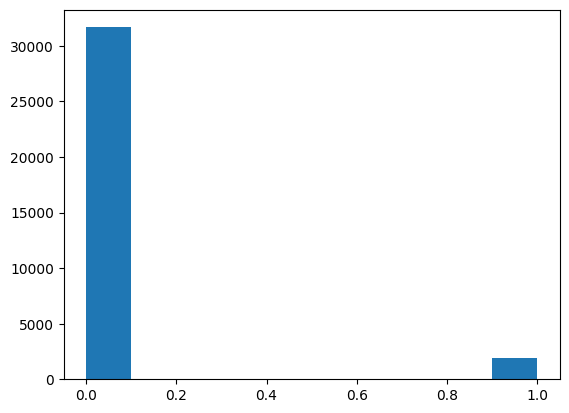

In [11]:
plt.hist(df["HadHeartAttack"])
plt.show()

Correlation

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33544 entries, 0 to 33543
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  33544 non-null  int64  
 1   State                      33544 non-null  object 
 2   Sex                        33544 non-null  object 
 3   GeneralHealth              33544 non-null  object 
 4   AgeCategory                33544 non-null  object 
 5   HeightInMeters             33544 non-null  float64
 6   WeightInKilograms          33544 non-null  float64
 7   BMI                        33544 non-null  float64
 8   HadHeartAttack             33544 non-null  int64  
 9   HadAngina                  33544 non-null  int64  
 10  HadStroke                  33544 non-null  int64  
 11  HadAsthma                  33544 non-null  int64  
 12  HadSkinCancer              33544 non-null  int64  
 13  HadCOPD                    33544 non-null  int64  


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['State'] = le.fit_transform(df['State'])
df['Sex'] = le.fit_transform(df['Sex'])
df['GeneralHealth'] = le.fit_transform(df['GeneralHealth'])
df['AgeCategory'] = le.fit_transform(df['AgeCategory'])
df['HadDiabetes'] = le.fit_transform(df['HadDiabetes'])
df['SmokerStatus'] = le.fit_transform(df['SmokerStatus'])
df['ECigaretteUsage'] = le.fit_transform(df['ECigaretteUsage'])
df['RaceEthnicityCategory'] = le.fit_transform(df['RaceEthnicityCategory'])
df['TetanusLast10Tdap'] = le.fit_transform(df['TetanusLast10Tdap'])


In [14]:
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,0,0,1,11,1.63,84.820000,32.099998,0,1,...,0,1.0,4,0.0,0.0,0.0,1.0,0,0.0,1.0
1,2,0,0,4,9,1.60,71.669998,27.990000,0,0,...,0,0.0,4,0.0,0.0,1.0,1.0,1,0.0,0.0
2,3,0,1,0,8,1.78,71.209999,22.530001,0,0,...,0,0.0,4,1.0,0.0,0.0,0.0,2,0.0,0.0
3,4,0,1,4,10,1.78,95.250000,30.129999,0,0,...,0,0.0,4,0.0,0.0,1.0,1.0,2,0.0,0.0
4,5,0,0,2,6,1.68,78.019997,27.760000,0,0,...,0,1.0,0,0.0,0.0,1.0,0.0,0,0.0,0.0


In [15]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [16]:
from imblearn.over_sampling import SMOTE
x=df[['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory','HeightInMeters', 'WeightInKilograms', 'BMI','HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD','HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis','HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty','DifficultyConcentrating', 'DifficultyWalking','DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus','ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory','AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver','TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']]
y=df["HadHeartAttack"]
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x,y)

smote_df = pd.concat([X_train_smote, y_train_smote], axis=1)
df=smote_df



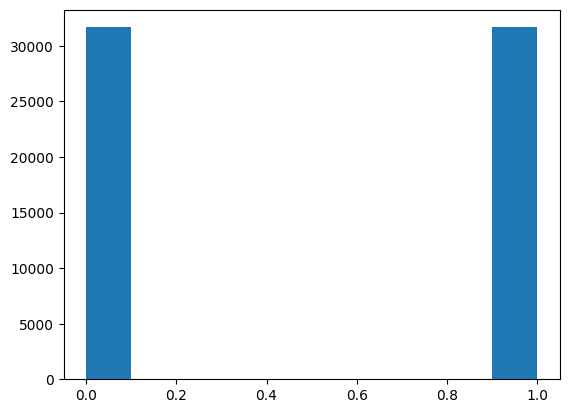

In [17]:
plt.hist(df["HadHeartAttack"])
plt.show()

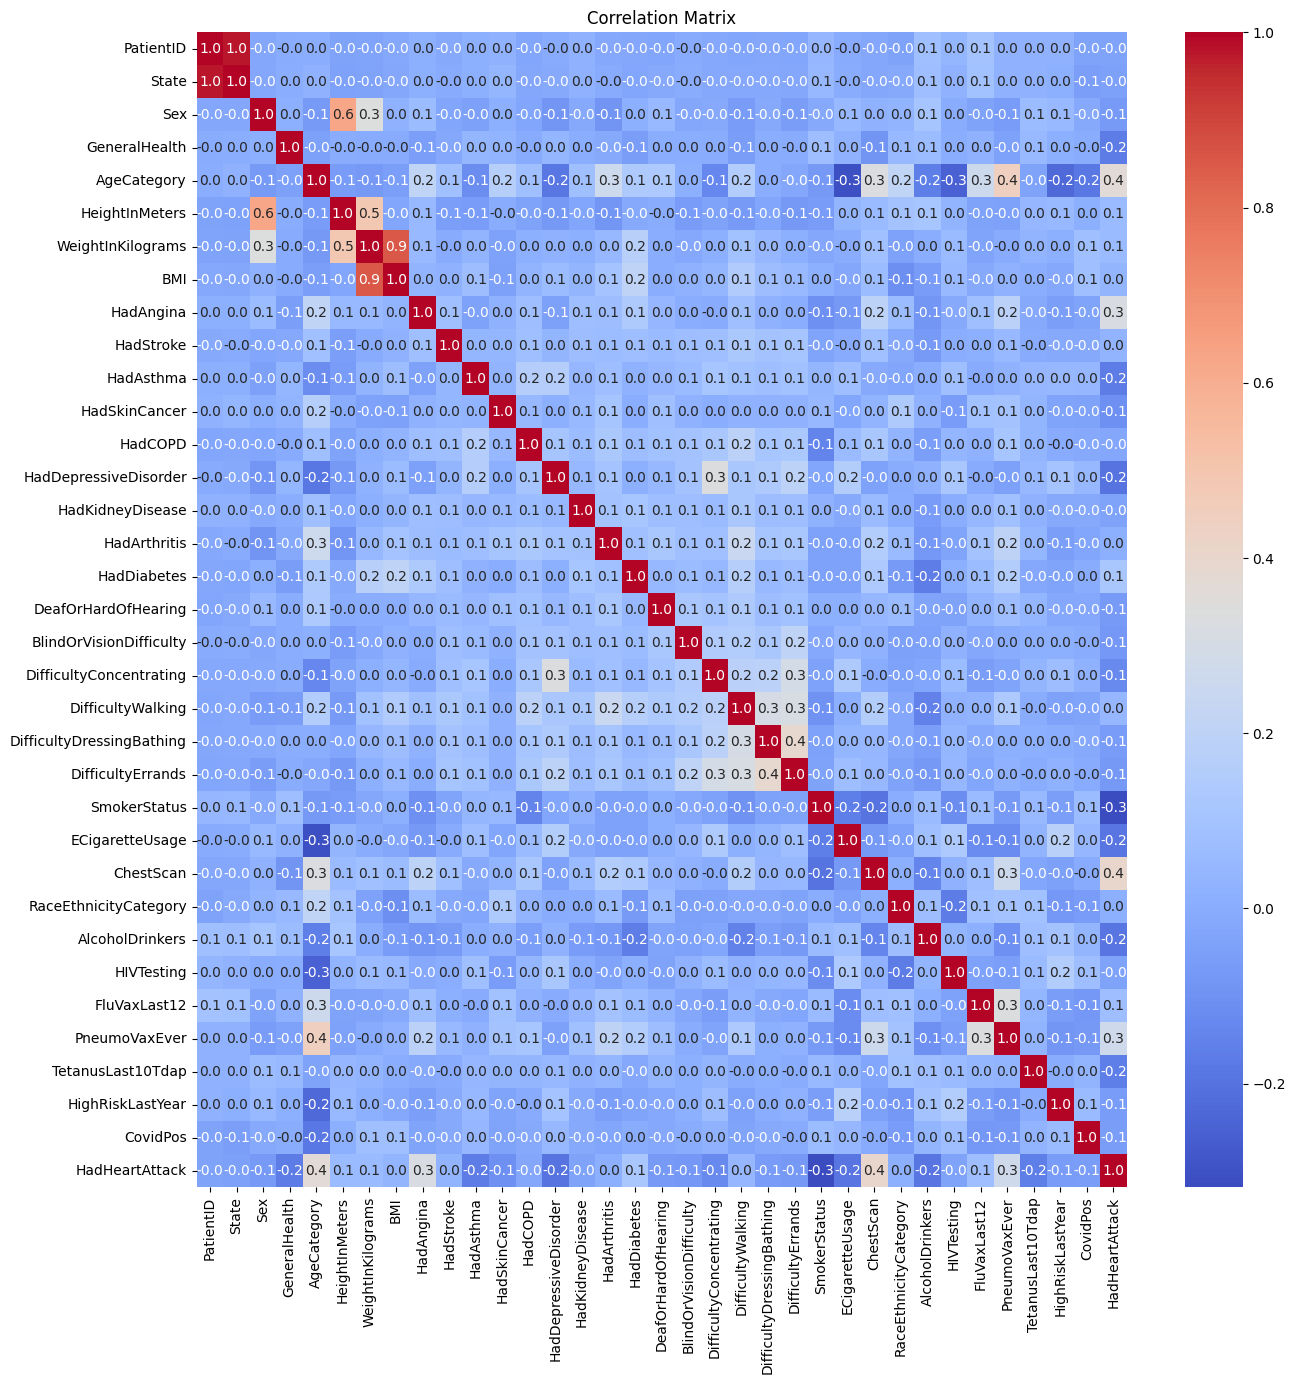

In [18]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm') # 0.01f should be given for float values, d for integers
plt.title('Correlation Matrix')
plt.show()

In [19]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')

In [20]:
df.shape

(63334, 35)

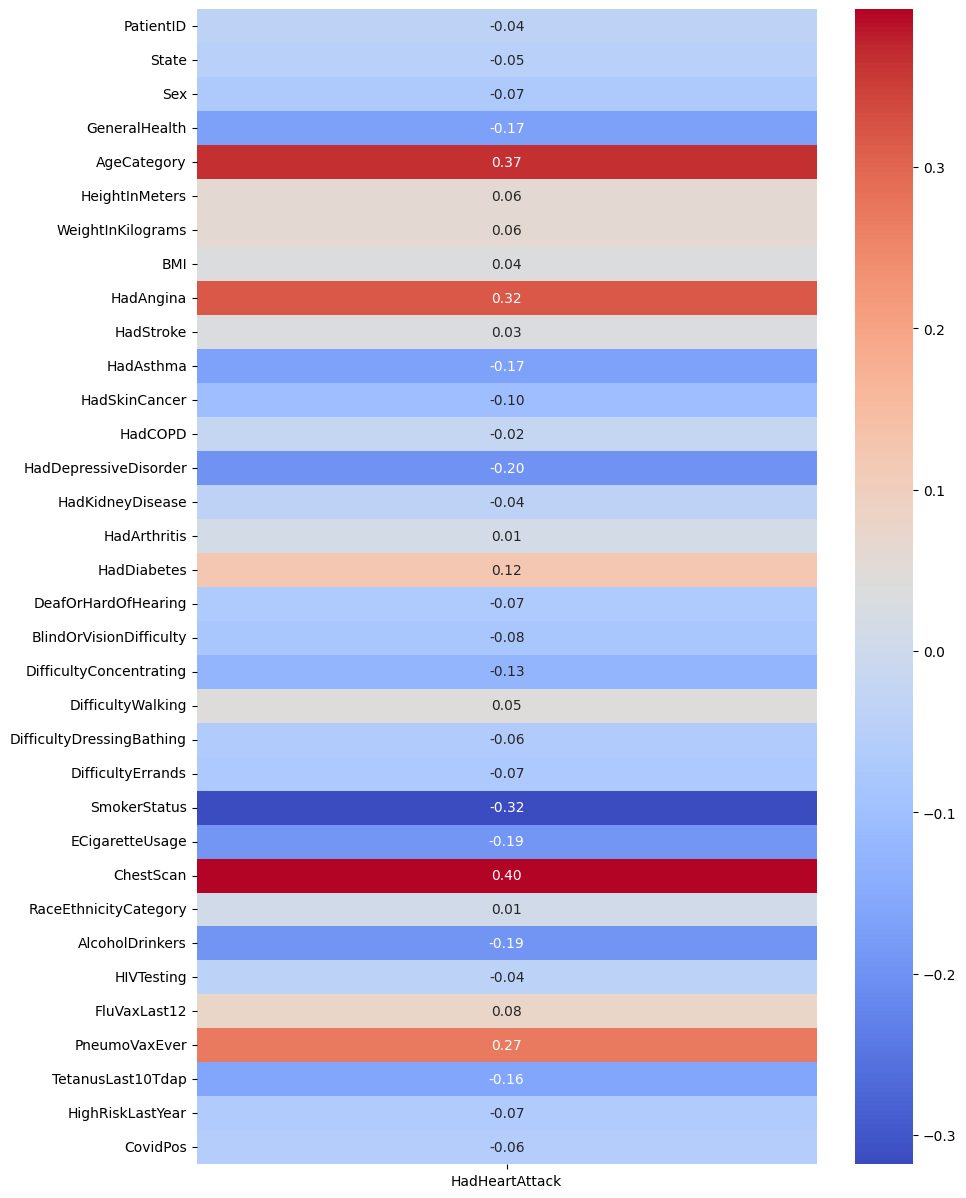

In [21]:

hha_corr = df.corr()['HadHeartAttack']

hha_corr = hha_corr.drop('HadHeartAttack')

plt.figure(figsize=(10,15))
sns.heatmap(hha_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',cbar=True, annot_kws={'size': 10})
plt.show()

In [22]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')

In [23]:
df.drop(['PatientID', 'State', 'Sex','HeightInMeters', 'WeightInKilograms', 'BMI', 'HadStroke', 'HadCOPD','HadKidneyDisease', 'HadArthritis','DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyWalking','DifficultyDressingBathing', 'DifficultyErrands','RaceEthnicityCategory','PneumoVaxEver',],axis=1,inplace=True)

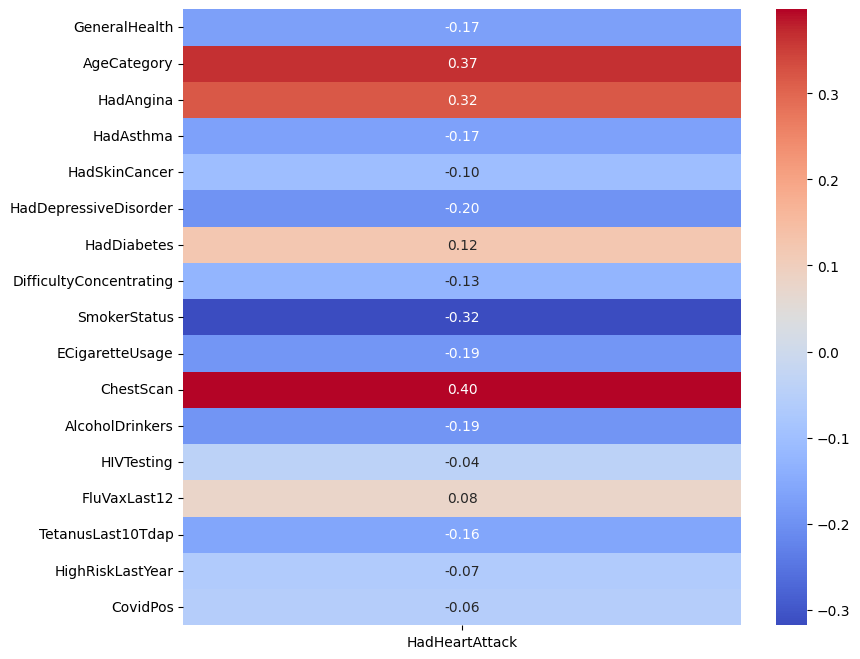

In [24]:
hha_corr = df.corr()['HadHeartAttack']

hha_corr = hha_corr.drop('HadHeartAttack')

plt.figure(figsize=(9,8))
sns.heatmap(hha_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',cbar=True, annot_kws={'size': 10})
plt.show()

<Axes: >

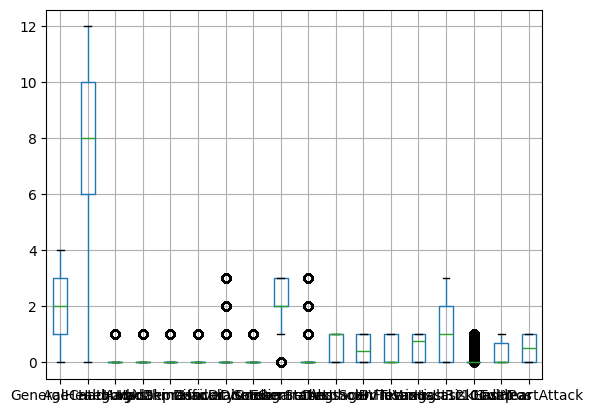

In [25]:
df.boxplot()

In [26]:

def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:

        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, exclude_column='HadHeartAttack')
df=df_cleaned

In [27]:
df.shape

(22630, 18)

In [28]:
df.columns

Index(['GeneralHealth', 'AgeCategory', 'HadAngina', 'HadAsthma',
       'HadSkinCancer', 'HadDepressiveDisorder', 'HadDiabetes',
       'DifficultyConcentrating', 'SmokerStatus', 'ECigaretteUsage',
       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ['GeneralHealth', 'AgeCategory', 'HadAngina', 'HadAsthma','HadSkinCancer', 'HadDepressiveDisorder', 'HadDiabetes','DifficultyConcentrating', 'SmokerStatus', 'ECigaretteUsage','ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12','TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',]

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(scaled_data, columns=features)

In [30]:
df.columns

Index(['GeneralHealth', 'AgeCategory', 'HadAngina', 'HadAsthma',
       'HadSkinCancer', 'HadDepressiveDisorder', 'HadDiabetes',
       'DifficultyConcentrating', 'SmokerStatus', 'ECigaretteUsage',
       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')

Prediction

In [31]:
from sklearn.linear_model import LogisticRegression

X=df[['GeneralHealth', 'AgeCategory', 'HadAngina', 'HadAsthma','HadSkinCancer', 'HadDepressiveDisorder', 'HadDiabetes','DifficultyConcentrating', 'SmokerStatus', 'ECigaretteUsage','ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12','TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',]]
y=df['HadHeartAttack']


In [32]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [33]:
df.head()

,GeneralHealth,AgeCategory,HadAngina,HadAsthma,HadSkinCancer,HadDepressiveDisorder,HadDiabetes,DifficultyConcentrating,SmokerStatus,ECigaretteUsage,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadHeartAttack
1,4,9,0,0,0,0,0,0,2,0,0.0,0.0,0.0,1.0,1,0.0,0.0,0
2,0,8,0,0,0,0,0,0,3,0,0.0,1.0,0.0,0.0,2,0.0,0.0,0
4,2,6,0,0,0,0,0,0,3,0,1.0,0.0,0.0,1.0,0,0.0,0.0,0
5,4,11,0,0,0,0,0,0,2,0,1.0,1.0,0.0,0.0,0,0.0,1.0,0
6,2,10,0,0,0,0,0,0,3,0,1.0,1.0,0.0,0.0,0,0.0,0.0,0


In [34]:
predicted_class=model.predict([[4,9,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0]])
print(predicted_class)

[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Train,Test,Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7863202545068929

decision tree

In [37]:
df.columns

Index(['GeneralHealth', 'AgeCategory', 'HadAngina', 'HadAsthma',
       'HadSkinCancer', 'HadDepressiveDisorder', 'HadDiabetes',
       'DifficultyConcentrating', 'SmokerStatus', 'ECigaretteUsage',
       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')

In [38]:
import pandas as pd
df
target=df["HadHeartAttack"]
target

inputs=df.drop(["HadHeartAttack"],axis="columns")
inputs

,GeneralHealth,AgeCategory,HadAngina,HadAsthma,HadSkinCancer,HadDepressiveDisorder,HadDiabetes,DifficultyConcentrating,SmokerStatus,ECigaretteUsage,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,TetanusLast10Tdap,HighRiskLastYear,CovidPos
1,4,9,0,0,0,0,0,0,2,0,0.000000,0.000000,0.000000,1.000000,1,0.0,0.0
2,0,8,0,0,0,0,0,0,3,0,0.000000,1.000000,0.000000,0.000000,2,0.0,0.0
4,2,6,0,0,0,0,0,0,3,0,1.000000,0.000000,0.000000,1.000000,0,0.0,0.0
5,4,11,0,0,0,0,0,0,2,0,1.000000,1.000000,0.000000,0.000000,0,0.0,1.0
6,2,10,0,0,0,0,0,0,3,0,1.000000,1.000000,0.000000,0.000000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63324,1,9,0,0,0,0,0,0,2,0,1.000000,0.613613,0.386387,0.000000,0,0.0,0.0
63325,2,11,0,0,0,0,0,0,2,0,1.000000,1.000000,0.647590,0.352410,1,0.0,0.0
63326,0,10,0,0,0,0,0,0,2,0,0.084287,0.000000,0.000000,1.000000,0,0.0,0.0
63329,1,2,0,0,0,0,0,0,3,0,0.000000,0.162271,0.162271,0.000000,0,0.0,0.0


In [39]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs,target)
model.score(inputs,target)

0.9826778612461334

In [40]:
df.head()

,GeneralHealth,AgeCategory,HadAngina,HadAsthma,HadSkinCancer,HadDepressiveDisorder,HadDiabetes,DifficultyConcentrating,SmokerStatus,ECigaretteUsage,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadHeartAttack
1,4,9,0,0,0,0,0,0,2,0,0.0,0.0,0.0,1.0,1,0.0,0.0,0
2,0,8,0,0,0,0,0,0,3,0,0.0,1.0,0.0,0.0,2,0.0,0.0,0
4,2,6,0,0,0,0,0,0,3,0,1.0,0.0,0.0,1.0,0,0.0,0.0,0
5,4,11,0,0,0,0,0,0,2,0,1.0,1.0,0.0,0.0,0,0.0,1.0,0
6,2,10,0,0,0,0,0,0,3,0,1.0,1.0,0.0,0.0,0,0.0,0.0,0


In [41]:
model.predict([[4,9,0,0,0,0,0,0,2,0,0,0,0,1,1,0,0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

SVm

In [42]:
y=df['HadHeartAttack']
x=df.drop(["HadHeartAttack"],axis="columns")

In [43]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [44]:
from sklearn.svm import SVC
model=SVC()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8455284552845529

In [45]:
model.predict(xtest)

array([0, 1, 1, ..., 0, 0, 0])

In [46]:
ytest

,HadHeartAttack
20888,1
62259,1
57888,1
17098,0
61663,1
...,...
30716,0
19714,0
30255,0
44399,1


In [47]:
#linear kernal
svc_1 = SVC(kernel="linear")
svc_1.fit(xtrain, ytrain)
svc_1.score(xtest, ytest)

0.8016967126193001

In [48]:
#Sigmoid Kernel
svc_4 = SVC(kernel ='sigmoid')
svc_4.fit(xtrain, ytrain)
svc_4.score(xtest, ytest)

0.556203605514316

random forest

In [49]:
y=df['HadHeartAttack']
x=df.drop(["HadHeartAttack"],axis="columns")

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [51]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9694238246730293

In [52]:
model.predict(xtest.head())

array([0, 1, 0, 0, 0])

In [53]:
ytest.head()

,HadHeartAttack
27413,0
57550,1
31229,0
20337,0
20854,0


Conclusion

In this project, a machine learning approach was applied to analyze patient demographic, lifestyle, and medical history data to predict COVID-19 positivity. By preprocessing a large healthcare dataset and training a classification model, meaningful patterns related to age, existing health conditions, and lifestyle habits were identified.
the highest accuracy training model is decision tree with accuracy 0.98